<a href="https://colab.research.google.com/github/kavishant87/DTSA_5799_Unsupervised_finalproject/blob/main/DTSA_5799_Unsupervised_Topic_Model_Final_Project_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised_Final_Project DTSA_5799
The Data
Prof. Julian McAuley at UC-San Diego has graciously let me use his “
Amazon Product Data
” database. It contains tons of data about Amazon products. Specifically, we will leverage two datasets: (1) meta-data about products and (2) product reviews. The aforementioned database has reviews on all types of Amazon products, but these datasets are huge (~80gb).

I’ve picked two smaller datasets that only contain (1) meta-data about products that are categorized as “Clothing, Shoes & Jewelry” and (2) reviews about products that are in the “Clothing, Shoes & Jewelry” category.

The product data:

http://128.138.93.164/meta_Clothing_Shoes_and_Jewelry.json.gz

The review data here:

http://128.138.93.164/reviews_Clothing_Shoes_and_Jewelry.json.gz

In [24]:
!wget http://128.138.93.164/meta_Clothing_Shoes_and_Jewelry.json.gz -P /content/drive/MyDrive

--2023-11-25 07:41:39--  http://128.138.93.164/meta_Clothing_Shoes_and_Jewelry.json.gz
Connecting to 128.138.93.164:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-11-25 07:41:39 ERROR 404: Not Found.




The Link provided was showing **404 Not Found error**:
http://128.138.93.164/meta_Clothing_Shoes_and_Jewelry.json.gz:
http://128.138.93.164/reviews_Clothing_Shoes_and_Jewelry.json.gz:
So , using direct source from Lectures Programming Assignment Json Files for Both Meta and Reviews

# Import Libraries
# Mounting My google drive
# Uncompressing gzip json files for further analysis

In [26]:
import pickle
import json
from time import sleep
from google.colab import drive
drive.mount('/content/drive')
!gzip -d /content/drive/MyDrive/meta_Clothing_Shoes_and_Jewelry.jsonl

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
gzip: /content/drive/MyDrive/meta_Clothing_Shoes_and_Jewelry.jsonl: unknown suffix -- ignored


Import the product and review data and focus the datasets on the Nike brand. This is accomplished by identifing the ASINs associated with products related to the Nike brand using the product dataset. Using a list of the products, the reviews can be filtered with the list of ASINs, resulting in a subset of review data associated to the Nike brand.

In [27]:

##this assigns the filename we're trying to load in to a string variable
working_directory = '/content/drive/MyDrive'
working_file = '%s/meta_Clothing_Shoes_and_Jewelry.jsonl' % working_directory
loadedjson = open(working_file, 'r')

In [28]:

import os
import pickle
import gzip
import itertools
import json
import numpy as np
import pandas as pd
import nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random
import json
import pickle
import scipy.sparse
import spacy
try:
  from bertopic import BERTopic
  from tmtoolkit.corpus import Corpus
except:
  !pip install bertopic[all]



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:

asins = []
shoes_asins = []
socks_asins = []
watches_asins = []
clothing_asins = []
men_asins = []
women_asins = []
count = 0
#allproducts = {}
for aline in loadedjson:
    count += 1
    prod_data = json.loads(aline)
    categories = [c.lower() for c in
                      list(itertools.chain(*prod_data.get("categories", [])))]
    if "nike" in categories:

      asins.append(prod_data["asin"])
      if "shoes" in categories:
        shoes_asins.append(prod_data["asin"])
      if "socks" in categories:
        socks_asins.append(prod_data["asin"])
      if "watches" in categories:
         watches_asins.append(prod_data["asin"])
      if "clothing" in categories:
        clothing_asins.append(prod_data["asin"])
      if "men" in categories:
        men_asins.append(prod_data["asin"])
      if "women" in categories:
        women_asins.append(prod_data["asin"])
json.dump(asins, open('drive/MyDrive/asins.json', 'w'))
json.dump(shoes_asins, open('drive/MyDrive/shoes.json', 'w'))
json.dump(socks_asins, open('drive/MyDrive/socks.json', 'w'))
json.dump(watches_asins, open('drive/MyDrive/watches.json', 'w'))
json.dump(clothing_asins, open('drive/MyDrive/clothing.json', 'w'))
json.dump(men_asins, open('drive/MyDrive/men.json', 'w'))
json.dump(women_asins, open('drive/MyDrive/women.json', 'w'))
print('There are ' + str(len(asins)) + ' Nike products on Amazon out of a total of ' +  str(count) + ' products.')
print('There are ' + str(len(shoes_asins)) + ' Nike shoe products.')
print('There are ' + str(len(clothing_asins)) + ' Nike clothing products.')
print('There are ' + str(len(watches_asins)) + ' Nike watch products.')
print('There are ' + str(len(socks_asins)) + ' Nike socks products.')

There are 8327 Nike products on Amazon out of a total of 1503384 products.
There are 6609 Nike shoe products.
There are 707 Nike clothing products.
There are 341 Nike watch products.
There are 124 Nike socks products.


In [30]:

print('There are ' + str(len(asins)) + ' Nike products on Amazon out of a total of ' +  str(count) + ' products.')


There are 8327 Nike products on Amazon out of a total of 1503384 products.


In [31]:
import pickle
import json
from time import sleep
from google.colab import drive
drive.mount('/content/drive')
!gzip -d /content/drive/MyDrive/reviews_Clothing_Shoes_and_Jewelry.json

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
gzip: /content/drive/MyDrive/reviews_Clothing_Shoes_and_Jewelry.json: unknown suffix -- ignored


In [32]:
##this assigns the filename we're trying to load in to a string variable
working_directory = '/content/drive/MyDrive'
working_file = '%s/reviews_Clothing_Shoes_and_Jewelry.json' % working_directory
loadedjson = open(working_file, 'r')

In [33]:
all_reviews = []
shoes_reviews = []
socks_reviews = []
watches_reviews = []
men_reviews = []
clothing_reviews = []
women_reviews = []
nike_reviews = {}
for aline in loadedjson:
  count  = 0
  totalreviews = 5748920
  count += 1
  if count % 1000000 == 0:
    print(count/totalreviews)
  data = json.loads(aline)
  if data["asin"] in asins:
    thereview = data
    theasin = thereview['asin']
    reviewerid = thereview['reviewerID']
    if theasin in asins:
      thekey = '%s.%s' % (theasin, reviewerid)
      nike_reviews[thekey] = thereview
      all_reviews.append(thereview['reviewText'])
    if data["asin"] in shoes_asins:
      shoes_reviews.append(thereview['reviewText'])
    if data["asin"] in socks_asins:
      socks_reviews.append(thereview['reviewText'])
    if data["asin"] in watches_asins:
      watches_reviews.append(thereview['reviewText'])
    if data["asin"] in clothing_asins:
      clothing_reviews.append(thereview['reviewText'])
    if data["asin"] in men_asins:
      men_reviews.append(thereview['reviewText'])
    if data["asin"] in women_asins:
      women_reviews.append(thereview['reviewText'])
json.dump(nike_reviews, open('drive/MyDrive/allnike_reviews.json', 'w'))
json.dump(all_reviews, open('drive/MyDrive/all_reviews.json', 'w'))
json.dump(shoes_reviews, open('drive/MyDrive/shoes_reviews.json', 'w'))
json.dump(socks_reviews, open('drive/MyDrive/socks_reviews.json', 'w'))
json.dump(watches_reviews, open('drive/MyDrive/watches_reviews.json', 'w'))
json.dump(clothing_reviews, open('drive/MyDrive/clothing_reviews.json', 'w'))
json.dump(men_reviews, open('drive/MyDrive/men_reviews.json', 'w'))
json.dump(women_reviews, open('drive/MyDrive/women_reviews.json', 'w'))
print(len(nike_reviews), len(all_reviews))
print(' ')
print('There are ' + str(len(all_reviews)) + ' reviews of Nike products.')
print('There are ' + str(len(shoes_reviews)) + ' reviews of shoes.')
print('There are ' + str(len(clothing_reviews)) + ' reviews of clothing.')
print('There are ' + str(len(watches_reviews)) + ' reviews of watches.')
print('There are ' + str(len(socks_reviews)) + ' reviews of socks.')

21570 21570
 
There are 21570 reviews of Nike products.
There are 16861 reviews of shoes.
There are 1829 reviews of clothing.
There are 1098 reviews of watches.
There are 814 reviews of socks.


# 3.&nbsp;Preprocessing the Data

In [34]:
with open('drive/MyDrive/all_reviews.json') as json_file:
    all = json.load(json_file)

with open('drive/MyDrive/shoes_reviews.json') as json_file:
    shoes = json.load(json_file)

with open('drive/MyDrive/socks_reviews.json') as json_file:
    socks = json.load(json_file)

with open('drive/MyDrive/watches_reviews.json') as json_file:
    watches = json.load(json_file)

with open('drive/MyDrive/clothing_reviews.json') as json_file:
    clothing = json.load(json_file)

with open('drive/MyDrive/allnike_reviews.json') as json_file:
    nike_reviews = json.load(json_file)


In [35]:

all[1]

'Very cute and is really practical. Fits better on smaller wrists which is my case. I wear them everywhere. I really love this watch!'

In [36]:
shoes[1]

"I received these shoes last week. Aside from the usual break in period (stiffness), these shoes didn't take long to soften up.  My heels usually take a beating when I walk the golf course.  After my first round of golf wearing these shoes, my heels felt fine and no pain in the usual areas."

In [37]:
watches[1]

'Very cute and is really practical. Fits better on smaller wrists which is my case. I wear them everywhere. I really love this watch!'

In [38]:
!pip install -U "tmtoolkit[recommended]"
import tmtoolkit
import os
import nltk
import random
import numpy as np
from tmtoolkit.corpus import Corpus, corpus_add_tabular
import json
import pickle
import scipy.sparse
import pandas as pd
# Enable logging to see the progress of long-running operations
from tmtoolkit.utils import enable_logging
from tmtoolkit.corpus import Corpus, print_summary
enable_logging()
random.seed(20191120)   # to make the sampling reproducible
np.set_printoptions(precision=5)

In [39]:
import os
try:
  import tmtoolkit
except:
  print('starting patch of tmtoolkit.')
  !pip install --quiet -U "tmtoolkit[recommended,lda,sklearn,wordclouds,textproc_extra,topic_modeling_eval_extra]"
  print('finished patch of tmtoolkit.')
  os.kill(os.getpid(), 9)


In [40]:
json_path = "%s/allnike_reviews.json" % working_directory

In [41]:
from time import sleep
json_file = json.load(open(json_path, 'r'))

for a_review in json_file:
  the_review = json_file[a_review]

the_review

{'reviewerID': 'A1KBC812A7RSY9',
 'asin': 'B00L5K86LO',
 'reviewerName': 'B',
 'helpful': [0, 0],
 'reviewText': 'Love it !',
 'overall': 5.0,
 'summary': 'So CUTE',
 'unixReviewTime': 1405814400,
 'reviewTime': '07 20, 2014'}

In [42]:
# Load the JSON file
from tmtoolkit.corpus import Corpus, print_summary
json_path = '/content/drive/MyDrive/allnike_reviews.json'
with open(json_path, 'r') as f:
    json_file = json.load(f)
reviews = {doc_id: json_file[doc_id] for doc_id in list(json_file)[:-1]}
df_reviews = pd.DataFrame([
    {'doc_id': doc_id, 'reviewText': review_data['reviewText']}
    for doc_id, review_data in reviews.items()
])
csv_path = '/content/drive/MyDrive/reviews.csv'
df_reviews.to_csv(csv_path, index=False)
corpus = Corpus(language='en')
corpus_add_tabular(corpus, csv_path, id_column='doc_id', text_column='reviewText')

2023-11-25 10:14:26,116:INFO:tmtoolkit:creating Corpus instance with no documents
2023-11-25 10:14:26,116:INFO:tmtoolkit:creating Corpus instance with no documents
INFO:tmtoolkit:creating Corpus instance with no documents
2023-11-25 10:14:26,126:INFO:tmtoolkit:using serial processing
2023-11-25 10:14:26,126:INFO:tmtoolkit:using serial processing
INFO:tmtoolkit:using serial processing
2023-11-25 10:14:27,490:INFO:tmtoolkit:adding text from 21569 documents(s)
2023-11-25 10:14:27,490:INFO:tmtoolkit:adding text from 21569 documents(s)
INFO:tmtoolkit:adding text from 21569 documents(s)
2023-11-25 10:14:27,508:INFO:tmtoolkit:running NLP pipeline on 21569 documents
2023-11-25 10:14:27,508:INFO:tmtoolkit:running NLP pipeline on 21569 documents
INFO:tmtoolkit:running NLP pipeline on 21569 documents


In [43]:
print(len(corpus))

21569


2023-11-25 10:18:21,291:INFO:tmtoolkit:replacing 8833 token hashes
2023-11-25 10:18:21,291:INFO:tmtoolkit:replacing 8833 token hashes
INFO:tmtoolkit:replacing 8833 token hashes
2023-11-25 10:18:22,048:INFO:tmtoolkit:replacing 3876 token hashes
2023-11-25 10:18:22,048:INFO:tmtoolkit:replacing 3876 token hashes
INFO:tmtoolkit:replacing 3876 token hashes
2023-11-25 10:18:22,536:INFO:tmtoolkit:processing document lengths
2023-11-25 10:18:22,536:INFO:tmtoolkit:processing document lengths
INFO:tmtoolkit:processing document lengths
2023-11-25 10:18:22,565:INFO:tmtoolkit:producing plot
2023-11-25 10:18:22,565:INFO:tmtoolkit:producing plot
INFO:tmtoolkit:producing plot


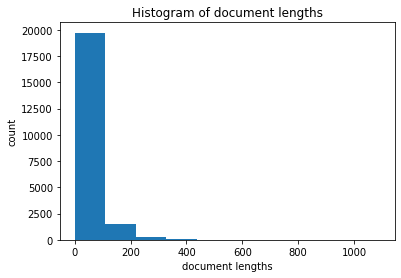

2023-11-25 10:18:22,832:INFO:tmtoolkit:processing vocabulary counts
2023-11-25 10:18:22,832:INFO:tmtoolkit:processing vocabulary counts
INFO:tmtoolkit:processing vocabulary counts
2023-11-25 10:18:23,255:INFO:tmtoolkit:producing plot
2023-11-25 10:18:23,255:INFO:tmtoolkit:producing plot
INFO:tmtoolkit:producing plot


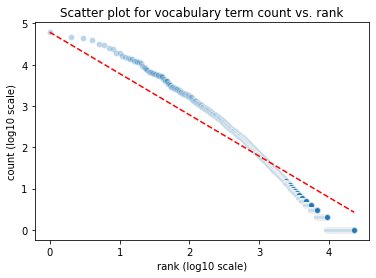

In [44]:
# Import necessary modules from tmtoolkit for preprocessing and visualization
from tmtoolkit.corpus import doc_tokens, tokens_table, vocabulary_counts
from tmtoolkit.corpus import to_lowercase, remove_punctuation, lemmatize
from tmtoolkit.corpus.visualize import plot_doc_lengths_hist, plot_ranked_vocab_counts

to_lowercase(corpus)
remove_punctuation(corpus)
lemmatize(corpus)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot_doc_lengths_hist(fig, ax, corpus, y_log=False)  # Use linear scale on y-axis
plt.show()
fig, ax = plt.subplots()
plot_ranked_vocab_counts(fig, ax, corpus, zipf=True)  # Compare with Zipf's law
plt.show()

In [45]:
corpus[9]['token'][0:15]

['when',
 'it',
 'arrive',
 ',',
 'it',
 'have',
 'a',
 'dead',
 'battery',
 '--',
 'so',
 ',',
 'I',
 'have',
 'to']

# Creating Models :

Of all my evals, this is the only one that kind of follows the rules of both metrics, so I am eyeballing k = 12
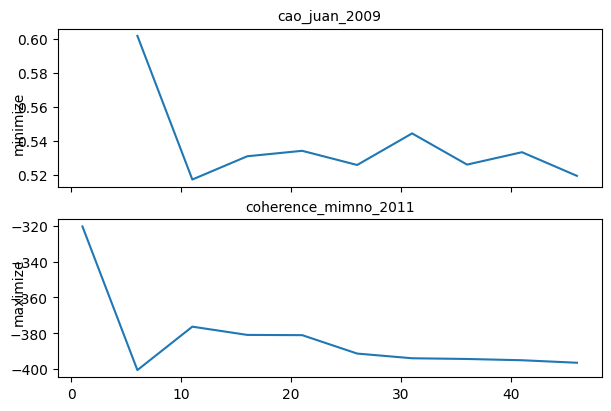

# Enabling the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

[Reference](https://colab.research.google.com/notebooks/gpu.ipynb)

In [46]:
import json
import pandas as pd
try:
  from bertopic import BERTopic
except:
  !pip install bertopic[all]
  os.kill(os.getpid(), 9)

# **Prepare data**
As simple as iterating through the json and adding the text to a list.

In [47]:
working_directory = '/content/drive/MyDrive'
json_path = "%s/allnike_reviews.json" % working_directory
json_file = json.load(open(json_path, 'r'))

In [48]:
allreviewtext = []
for areview in json_file:
  allreviewtext.append(json_file[areview]['reviewText'])
allreviewtext[0]
len(allreviewtext)

21570

# **Topic Modeling**

In this example, we will go through the main components of BERTopic and the steps necessary to create a strong topic model.




## Training

We start by instantiating BERTopic. We set language to `english` since our documents are in the English language. If you would like to use a multi-lingual model, please use `language="multilingual"` instead.

We will also calculate the topic probabilities. However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). It is advised to turn this off if you want to speed up the model.


The CountVectorizer(stop_words="english", ngram_range=(1, 3)) is from the scikit-learn library. It is a feature extraction model that is used to preprocess text data before creating a topic model.

The stop words parameter is used to specify the list of stop words that you want to exclude from the text data. In this example, the stop words are specified as "english", indicating that the model should use the standard list of English stop words.

The ngram_range parameter specifies the range of n-grams (sequences of tokens) that the model should consider when generating the bag-of-words representation of the text data. In this example, the model will consider n-grams of up to 3 tokens.

By using CountVectorizer(stop_words="english", ngram_range=(1, 3)), the model will extract features from the text data by counting the frequency of n-grams up to 3 tokens, while ignoring stop words. These features will be used to create the vocabulary of the topic model.

In [49]:
from sklearn.feature_extraction.text import CountVectorizer  #used to eliminate stop words
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(random_state=777)    #will set the random state seed in order to get consistent results
hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean', cluster_selection_method='eom', prediction_data=True, min_samples=20)  #used to set the min cluster and samples sizes
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, language="english", calculate_probabilities=False, vectorizer_model=CountVectorizer(stop_words="english", ngram_range=(1, 3)), verbose=True)
topics, probs = topic_model.fit_transform(shoes)

Batches:   0%|          | 0/527 [00:00<?, ?it/s]

2023-11-25 10:28:29,926 - BERTopic - Transformed documents to Embeddings
2023-11-25 10:28:48,580 - BERTopic - Reduced dimensionality
2023-11-25 10:28:51,930 - BERTopic - Clustered reduced embeddings


## Extracting Topics
After fitting our model, we can start by looking at the results. Typically, we look at the most frequent topics first as they best represent the collection of documents.

In [50]:
freq = topic_model.get_topic_info()
freq
len(freq)

49

-1 refers to all outliers and should typically be ignored. Next, let's take a look at a frequent topic that were generated:

In [51]:
topic_model.get_topic(0)  # Select the most frequent topic

[('running', 0.025993072583068814),
 ('shoes', 0.016185422519309246),
 ('run', 0.012669267528823944),
 ('shoe', 0.011683269346780014),
 ('running shoes', 0.011639257015089102),
 ('great', 0.01027470504782644),
 ('comfortable', 0.009431871943562571),
 ('light', 0.00861232145691282),
 ('love', 0.007445452556742242),
 ('good', 0.00729936670749763)]

# **Visualization**
There are several visualization options available in BERTopic, namely the visualization of topics, probabilities and topics over time. Topic modeling is, to a certain extent, quite subjective. Visualizations help understand the topics that were created.

In [52]:
topic_model.visualize_topics()

In [53]:
topic_model.visualize_documents(all)

In [54]:
topic_model.visualize_hierarchy()

In [55]:
topic_model.visualize_heatmap()

In [57]:
topic_model.visualize_barchart(custom_labels=True,n_words=7, width=300, height = 300)

In [60]:
!pip install nltk
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")['compound']
df = pd.DataFrame(shoes)
sent = []
for x in range(len(df)):
  sent.append(sia.polarity_scores(df[0][x])['compound'])
print('Overall compound sensitivity rating for Nike shoes is slightly above average at ' + str(round(np.mean(sent),2)))

Overall compound sensitivity rating for Nike shoes is slightly above average at 0.63


## Best Rating For Nike Shoes:
This is a Python script that uses the scikit-learn library to evaluate compound sensitivity ratings for Nike shoes by topic. The script uses a topic modeling algorithm, such as Latent Dirichlet Allocation (LDA), to generate topics from a set of Nike shoe review documents. It then computes compound sensitivity ratings for each topic, which are a measure of how sensitive a topic is to changes in different components of the shoe. The script prints out the mean compound sensitivity rating for each topic rounded to two decimal places.

In [61]:
print('Compound sensitivity rating for Nike shoes by topic are: ' + str(round(np.mean(sent),2)))
for x in range(1,38):
  sent=[]
  temp = topic_model.get_representative_docs(topic=x)
  for y in range(3):
    sent.append(sia.polarity_scores(temp[y])['compound'])

  print('Topic' + str(x) + ':', round(np.mean(sent),2))

Compound sensitivity rating for Nike shoes by topic are: 0.63
Topic1: 0.75
Topic2: 0.97
Topic3: 0.47
Topic4: 1.0
Topic5: 0.87
Topic6: 0.78
Topic7: 0.37
Topic8: 0.89
Topic9: 0.9
Topic10: 0.95
Topic11: 0.91
Topic12: 0.16
Topic13: 0.75
Topic14: 0.93
Topic15: 0.92
Topic16: 0.97
Topic17: 0.94
Topic18: -0.37
Topic19: 0.11
Topic20: 0.66
Topic21: 0.93
Topic22: 0.13
Topic23: 0.98
Topic24: 0.82
Topic25: 0.95
Topic26: 0.32
Topic27: 0.77
Topic28: 0.82
Topic29: -0.23
Topic30: 0.24
Topic31: 0.99
Topic32: 0.75
Topic33: 0.98
Topic34: 0.97
Topic35: 0.99
Topic36: 0.86
Topic37: 0.77


## Postive and Negative Raviews by topic:

In [62]:
print('Topics with very positive sentiment from reviews like the following:')
topic_model.get_representative_docs(topic=[1,33])

Topics with very positive sentiment from reviews like the following:


{-1: ['great fit', 'Great shoes', 'Love the shoes'],
 0: ["Hands down, the best shoes and most comfortable shoes I've ever worn. These shoes are very light, very soft/comfortable, and also has great foot support for those of us that have flat feet. I'm not much of a runner, but when I tried my first times of running in these shoes, it felt as if I was running on pillows for miles. Love these shoes and will start buying more pairs. I want to try using them when I play basketball, but I don't want to get my shoes dirty (although, it's very tempting to try it).I definitely recommend these shoes for everyday use or running.",
  "Feel/Fit:The first thing you notice with these is how great they feel when you put them on. It feels almost like you are wearing socks. They hug your feet. Everything except for the bottom is made of a knit/mesh type of material which makes these very light weight. The sizes are a bit weird, normally I wear a size 10.5 to 11 but with these I needed an 11.5. Unlike 

In [65]:
print('Topics with less positive sentiment from reviews like the following:')
t20 = topic_model.get_representative_docs(topic=20)
t20


Topics with less positive sentiment from reviews like the following:


['MY DOCTOR CONFIRMED THAT MY ARCHES HAVE FALLEN AND THAT I COULD NO LONGER WEAR MY BELOVED FLIP FLOPS SO I BROUGHT HIM MY ORIGINAL BLACK NIKE FLIP FLOPS WHICH HE SAID WAS ACCEPTABLE SUPPORT FOR MY FEET. I LOVE THE NIKE COMFORT THONG FLIP FLOPS AND HAVE THEM IN MANY COLORS.',
 "It so great! I never felt so comfortable in flip flops. Usually I'm the type of person who doesn't wear flip flops but these have change my opinion",
 'Great flip flops and very comfortable.']

In [85]:
t48 = topic_model.get_representative_docs(topic=47)
t48

In [71]:
df = pd.DataFrame.from_dict(nike_reviews).T
df.head(3)

reviewerID        asin        reviewerName  \
B0000V9K32.ACT5DY536GISV    ACT5DY536GISV  B0000V9K32         gaby "gaby"   
B0000V9K32.A3BVWMS9I8OH8U  A3BVWMS9I8OH8U  B0000V9K32  Tatiana A. Alencar   
B0000V9K3W.A5RZS69KSJH00    A5RZS69KSJH00  B0000V9K3W  Tackleberry "Tack"   

                          helpful  \
B0000V9K32.ACT5DY536GISV   [2, 5]   
B0000V9K32.A3BVWMS9I8OH8U  [0, 0]   
B0000V9K3W.A5RZS69KSJH00   [0, 0]   

                                                                  reviewText  \
B0000V9K32.ACT5DY536GISV   the colour i received is not blue as shown but...   
B0000V9K32.A3BVWMS9I8OH8U  Very cute and is really practical. Fits better...   
B0000V9K3W.A5RZS69KSJH00   The watch was exactly what i ordered and I got...   

                          overall                    summary unixReviewTime  \
B0000V9K32.ACT5DY536GISV      3.0             not the colour     1248652800   
B0000V9K32.A3BVWMS9I8OH8U     5.0        Cute and practical!     1261785600   
B0000V9K3W.A5RZS69KSJH00      4.0  Great watch, just too big     1256342400   

                            reviewTime  
B0000V9K32.ACT5DY536GISV   07 27, 2009  
B0000V9K32.A3BVWMS9I8OH8U  12 26, 2009  
B0000V9K3W.A5RZS69KSJH00   10 24, 2009

## Lowest Product rating:
**We can analyze the reviews based on reviews with the lowest product ratings:**

In [72]:
bad_ratings = [1,2]
bad_ratings_reviews=[]
for x in range(len(df[df['overall'].isin(bad_ratings)])):
  bad_ratings_reviews.append(df[df['overall'].isin(bad_ratings)].reviewText[x])

topics, probs = topic_model.fit_transform(bad_ratings_reviews)
topic_model.get_topic_info()

Batches:   0%|          | 0/71 [00:00<?, ?it/s]

2023-11-25 10:52:18,248 - BERTopic - Transformed documents to Embeddings
2023-11-25 10:52:31,977 - BERTopic - Reduced dimensionality
2023-11-25 10:52:32,056 - BERTopic - Clustered reduced embeddings


Topic  Count                       Name  \
0      0   2007     0_shoes_shoe_size_nike   
1      1    258  1_watch_band_nike_battery   

                                      Representation  \
0  [shoes, shoe, size, nike, like, pair, just, fi...   
1  [watch, band, nike, battery, time, wrist, just...   

                                 Representative_Docs  
0  [First of all, I absolutely love the design of...  
1  [I have owned this Nike watch for 7 months. It...

## Improvement of Product development:

Overall, the code is performing topic modeling on negative reviews based on their assigned ratings. It aims to identify the underlying topics in the reviews and gain insight into the sentiments expressed in those reviews.

In [73]:
df_bad = pd.DataFrame(bad_ratings_reviews)
sent = []
for x in range(len(df_bad)):
  sent.append(sia.polarity_scores(df_bad[0][x])['compound'])
print('Overall compound sensitivity rating for Nike products with poor reviews is ' + str(round(np.mean(sent),2)))

Overall compound sensitivity rating for Nike products with poor reviews is -0.0


In [74]:
topic_model.get_representative_docs(topic=1)
topic_model.get_representative_docs(topic=0)

["First of all, I absolutely love the design of the shoes. However, being that there Nike, I'm not surprised that I'm disappointed in this purchase. I wear a size 11, and I purchased size 12, and they're so tight they don't even fit my feet. This is probably the worst pair of shoes I've ever bought, and I will never buy another pair of Nike shocks ever again.",
 "...for kids!  This is nothing more than a fashion shoe.  Unfortunately, my son has several pair of these shoes (courtesy of his father) and I just think it's an overall poor shoe, especially for kids.  Assuming it's made of leather, it's got to be the cheapest of cheap.  The tongue of the shoe rubs against my son's foot, so there can be no real playing around (definitely no basketball play) in these shoes, which defeats the purpose!  There's no inner support/cushion, for the sole of the foot.  And the shoe strings are short (don't kids still double knot shoes?).  I have noticed darkening/irritation on my son's feet, from these

## Super reviewers:
**We can analyze the reviews based on reviewer attributes like those that are 'super users'**

In [75]:
print('There are ' + str(len(df.reviewerID.unique())) + ' unique reviewers of Nike products.')
print('There are ' + str(len(df.groupby(['reviewerID'])['reviewerID'].unique())) + ' unique reviewers of Nike products.')
df.groupby(['reviewerID'])['reviewerID'].count().sort_values(ascending=False)

There are 20423 unique reviewers of Nike products.
There are 20423 unique reviewers of Nike products.


reviewerID
A32D0TORRTI9E5    11
ARE2MDLUM3APW      7
A265PCQZA1Y1WF     7
A237P6ACWJR9LM     7
A1PR0WW5UQHL7X     6
                  ..
A28OHNECU3Y81O     1
A28OBIYVBPY0AH     1
A28O2L0HMXAFYW     1
A28NZPRUBGL3IC     1
AZZYW4YOE1B6E      1
Name: reviewerID, Length: 20423, dtype: int64

In [76]:
super = ['A32D0TORRTI9E5', 'ARE2MDLUM3APW','A265PCQZA1Y1WF','A237P6ACWJR9LM','A1PR0WW5UQHL7X']
super_reviews=[]
for x in range(len(df[df['reviewerID'].isin(super)])):
  super_reviews.append(df[df['reviewerID'].isin(super)].reviewText[x])

In [77]:
df_super = pd.DataFrame(super_reviews)
sent = []
for x in range(len(df_super)):
  sent.append(sia.polarity_scores(df_super[0][x])['compound'])
print('Overall compound sensitivity rating for Nike shoes based on reviwes from superusers is ' + str(round(np.mean(sent),2)))

Overall compound sensitivity rating for Nike shoes based on reviwes from superusers is 0.82


In [78]:
super_reviews

['Like the watch and the shape is very comfortable, however reading the face is some what difficult, not because it is small as this is not the case, just really hard to see. I think the glass is too thick',
 'Love the colour and pattern of these runners, and the pink highlights means they will go with more outfitsVery comfortable during work outs',
 "These 'Oncore High Skate Shoes' by Nike are both stylish and comfortable.  This high-top is designed for skateboarding - it gives great ankle support and is cushioned with Nike's 'Zoom Air Unit'.  With this in mind, I bought these sneakers primarily for street wear.PROS:These are 'crazy comfortable' shoes!The black with dark gray colorway looks great with jeans.Built tough, these Nike have a leather suede/nubuck upper with mesh tongue for breathability.The Nike 6.0 Oncore High's temperature technology fabric really works!  It keeps my feet comfortably cool.  Goodbye tired (and smelly) feet :))The 'Medium Width' sizing allows extra comfort

## Purchase Occasions :

In [86]:
t27 = topic_model.get_representative_docs(topic=27)
t27